# Video Game Sales By G26
This dataset contains a list of video games with sales greater than 100,000 copies. The fields include a ranking of overall sales, the name of the video game, the platform it was released on, the year it was released, genre of the game, publisher of the game, North American sales, European sales, Japanese sales, sales from the rest of the world and global sales, all of which are counted in terms in millions.

This dataset includes categorical data such as the name of the video game, the video game’s platform, genre, and publisher as well as numerical data such as its sales across the globe and its total global sales.




## Collection Process
The dataset used was collected using a scraping script obtained from “https://github.com/GregorUT/vgchartzScrape,” which was then published on https://www.kaggle.com/gregorut/videogamesales where we obtained the dataset. Due to how the data from vgchartz is gathered there may be some discrepancies to the actual sales of the game. The dataset shows how much a game has sold for a specific platform, games with several platforms appear in the dataset multiple times.

### Data Implications

### Imported Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Video Game Data
Each row in the dataset represents a particular video game released on or before the year 2020. Each column represents There are a total of 16,598 observations in the dataset and 11 variables. The dataset is composed of only a single csv file hence no merging is needed.

In [3]:
games = pd.read_csv('vgsales.csv')

If the csv file is viewed in Excel. One can see the dataset contains 16,598 observations and 11 variables. The following are the descriptions for each variable.
- Rank - Ranking of overall sales
- Name - The games name
- Platform - Platform of the games release (i.e. PC,PS4, etc.)
- Year - Year of the game's release
- Genre - Genre of the game
- Publisher - Publisher of the game
- NA_Sales - Sales in North America (in millions)
- EU_Sales - Sales in Europe (in millions)
- JP_Sales - Sales in Japan (in millions)
- Other_Sales - Sales in the rest of the world (in millions)
- Global_Sales - Total worldwide sales.


In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


### Cleaning of Dataset

In [5]:
games.isnull().any()

Rank            False
Name            False
Platform        False
Year             True
Genre           False
Publisher        True
NA_Sales        False
EU_Sales        False
JP_Sales        False
Other_Sales     False
Global_Sales    False
dtype: bool

Year and Publisher have null values and only contains a small portion of the dataset so can be safely dropped.

In [6]:
null = games.columns[games.isnull().any()].tolist()
games[null].isnull().sum()

Year         271
Publisher     58
dtype: int64

There is a Publisher "Unknown" which are invalid values.

In [7]:
games['Publisher'].unique()

array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Bethesda Softworks', 'Electronic Arts', 'Sega', 'SquareSoft',
       'Atari', '505 Games', 'Capcom', 'GT Interactive',
       'Konami Digital Entertainment',
       'Sony Computer Entertainment Europe', 'Square Enix', 'LucasArts',
       'Virgin Interactive', 'Warner Bros. Interactive Entertainment',
       'Universal Interactive', 'Eidos Interactive', 'RedOctane',
       'Vivendi Games', 'Enix Corporation', 'Namco Bandai Games',
       'Palcom', 'Hasbro Interactive', 'THQ', 'Fox Interactive',
       'Acclaim Entertainment', 'MTV Games', 'Disney Interactive Studios',
       nan, 'Majesco Entertainment', 'Codemasters', 'Red Orb', 'Level 5',
       'Arena Entertainment', 'Midway Games', 'JVC', 'Deep Silver',
       '989 Studios', 'NCSoft', 'UEP Systems', 'Parker Bros.', 'Maxis',
       'Imagic', 'Tecmo Koei', 'Valve Software', 'ASCII Entertainment',


In [8]:
(games['Publisher']=='Unknown').sum()

203

In [9]:
games = games[games.Publisher != 'Unknown']


In [10]:
(games['Publisher']=='Unknown').sum()

0

In [11]:
games = games.dropna(subset=['Year','Publisher'])

In [12]:
games.isnull().any()

Rank            False
Name            False
Platform        False
Year            False
Genre           False
Publisher       False
NA_Sales        False
EU_Sales        False
JP_Sales        False
Other_Sales     False
Global_Sales    False
dtype: bool

### End of Cleaning

### EDA questions
1. Performance of platforms based on global sales throughout the years (in terms of certain interval if too large)
2. Best performing latform of all time based on global sales
3. Regional sales based on Publisher
4. Comparing global with other sales in terms of ranking

In [13]:
print(games['Platform'].unique())
games['Platform'].unique().size

['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' '3DS' 'PS4' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'GC' 'WiiU' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


31

Due to the number of platforms we will be taking a random sample and use the chosen platforms

In [14]:
n =300
df_sample = games.sample(n,random_state = 11)
df_sample['Platform'].unique()

array(['GBA', 'DS', 'Wii', 'PS3', 'N64', 'PSP', 'PS2', 'PS', 'PC', 'PSV',
       'WiiU', 'GC', '3DS', 'PS4', 'XOne', 'GB', 'XB', 'SNES', 'X360',
       '2600', 'SAT', 'NES'], dtype=object)

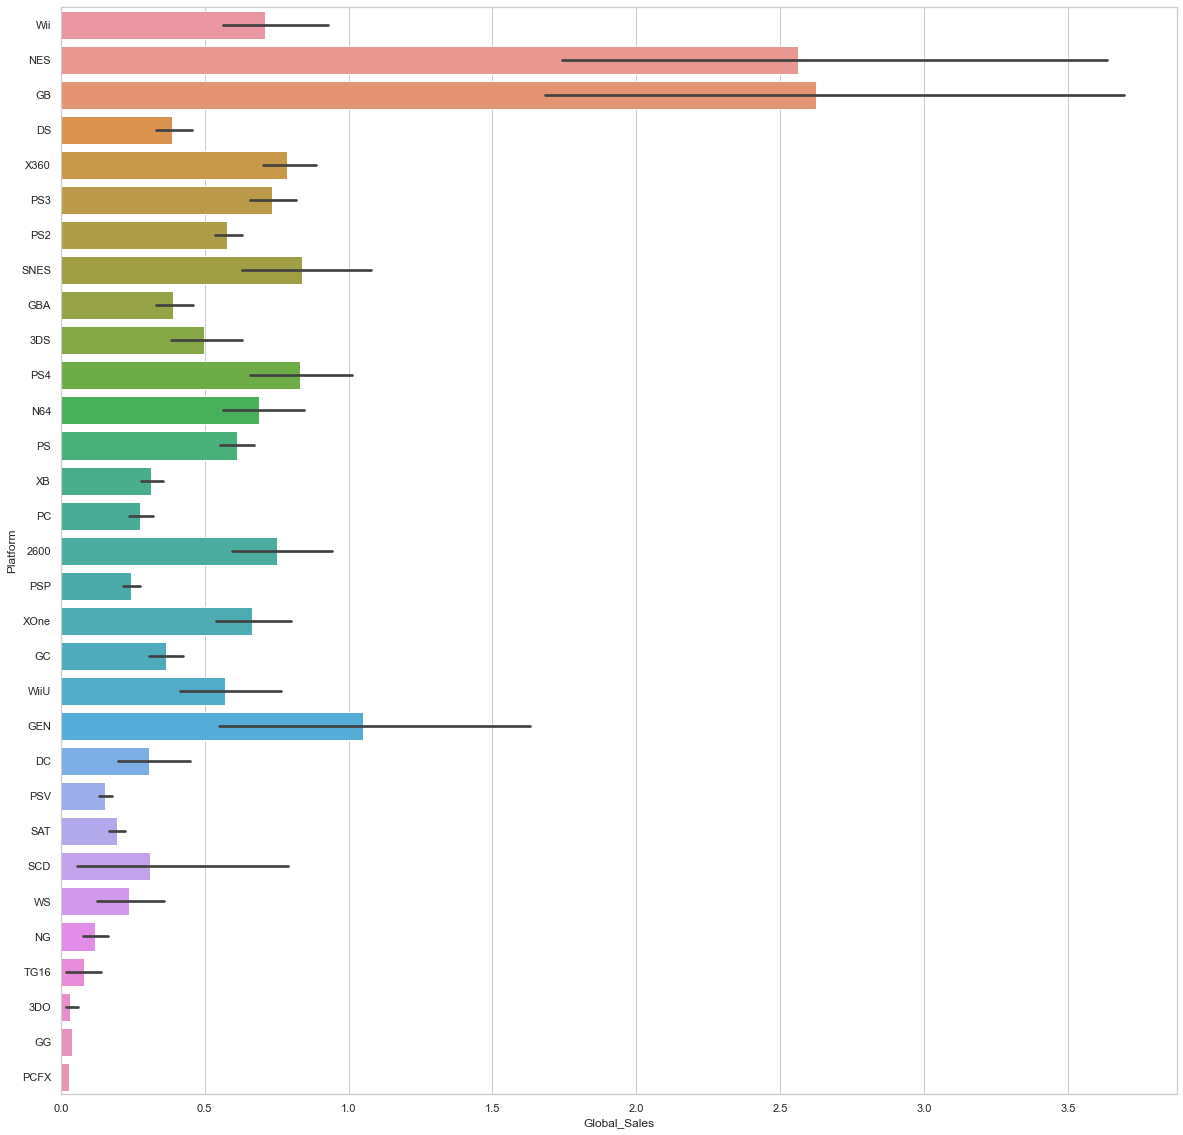

In [15]:
# This probably needs to be updated since the range of the global sales is too low
sns.set_theme(style="whitegrid")
plt.figure(figsize=(20,20))
ax = sns.barplot(x="Global_Sales",y="Platform",data = games)